In [1]:
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
import tensorflow as tf

C:\Users\srija\anaconda3\envs\TF\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\srija\anaconda3\envs\TF\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\srija\anaconda3\envs\TF\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\srija\anaconda3\envs\TF\lib\site-packages\tensorflow\python\framework\dty

In [3]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=None,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [4]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [5]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/10
12/12 [==============================] - 0s 8ms/sample - loss: 445.7053 - root_mean_squared_error: 21.1117
Epoch 2/10
12/12 [==============================] - 0s 167us/sample - loss: 434.7607 - root_mean_squared_error: 20.8509
Epoch 3/10
12/12 [==============================] - 0s 166us/sample - loss: 426.9523 - root_mean_squared_error: 20.6628
Epoch 4/10
12/12 [==============================] - 0s 166us/sample - loss: 420.4917 - root_mean_squared_error: 20.5059
Epoch 5/10
12/12 [==============================] - 0s 334us/sample - loss: 414.8135 - root_mean_squared_error: 20.3670
Epoch 6/10
12/12 [==============================] - 0s 166us/sample - loss: 409.6553 - root_mean_squared_error: 20.2399
Epoch 7/10
12/12 [==============================] - 0s 166us/sample - loss: 404.8715 - root_mean_squared_error: 20.1214
Epoch 8/10
12/12 [==========================

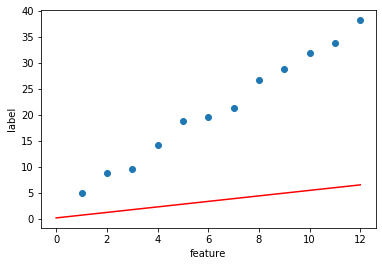

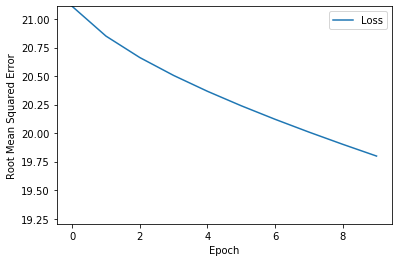

In [6]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/4
12/12 [==============================] - 0s 7ms/sample - loss: 284.9689 - root_mean_squared_error: 16.8810
Epoch 2/4
12/12 [==============================] - 0s 166us/sample - loss: 276.2358 - root_mean_squared_error: 16.6203
Epoch 3/4
12/12 [==============================] - 0s 166us/sample - loss: 270.0317 - root_mean_squared_error: 16.4326
Epoch 4/4
12/12 [==============================] - 0s 165us/sample - loss: 264.9143 - root_mean_squared_error: 16.2762


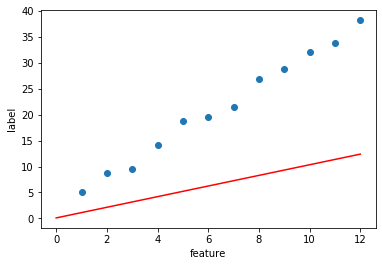

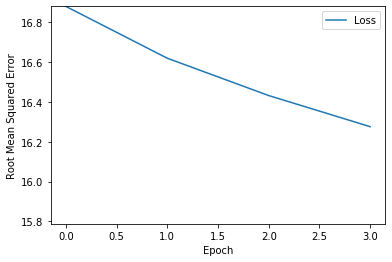

In [10]:
learning_rate=0.01
epochs=4
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/50
12/12 [==============================] - 0s 7ms/sample - loss: 859.9891 - root_mean_squared_error: 29.3256
Epoch 2/50
12/12 [==============================] - 0s 416us/sample - loss: 844.7557 - root_mean_squared_error: 29.0647
Epoch 3/50
12/12 [==============================] - 0s 166us/sample - loss: 833.8359 - root_mean_squared_error: 28.8762
Epoch 4/50
12/12 [==============================] - 0s 250us/sample - loss: 824.7706 - root_mean_squared_error: 28.7188
Epoch 5/50
12/12 [==============================] - 0s 166us/sample - loss: 816.7803 - root_mean_squared_error: 28.5794
Epoch 6/50
12/12 [==============================] - 0s 166us/sample - loss: 809.5036 - root_mean_squared_error: 28.4518
Epoch 7/50
12/12 [==============================] - 0s 249us/sample - loss: 802.7394 - root_mean_squared_error: 28.3327
Epoch 8/50
12/12 [==============================] - 0s 80us/sample - loss: 796.3630 - root_mean_squared_error: 28.2199
Epoch 9/50
12/12 [=========================

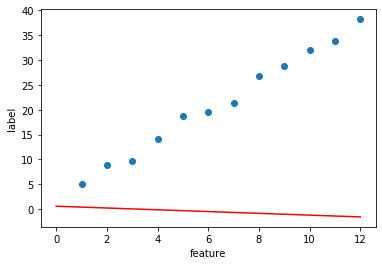

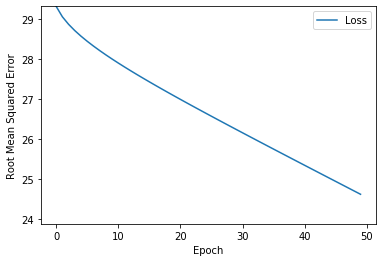

In [11]:
learning_rate=0.01
epochs=50
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
v=

Epoch 1/200
12/12 [==============================] - 0s 8ms/sample - loss: 298.0254 - root_mean_squared_error: 17.2634
Epoch 2/200
12/12 [==============================] - 0s 166us/sample - loss: 289.0923 - root_mean_squared_error: 17.0027
Epoch 3/200
12/12 [==============================] - 0s 83us/sample - loss: 282.7431 - root_mean_squared_error: 16.8150
Epoch 4/200
12/12 [==============================] - 0s 249us/sample - loss: 277.5042 - root_mean_squared_error: 16.6585
Epoch 5/200
12/12 [==============================] - 0s 249us/sample - loss: 272.9102 - root_mean_squared_error: 16.5200
Epoch 6/200
12/12 [==============================] - 0s 249us/sample - loss: 268.7454 - root_mean_squared_error: 16.3935
Epoch 7/200
12/12 [==============================] - 0s 333us/sample - loss: 264.8900 - root_mean_squared_error: 16.2754
Epoch 8/200
12/12 [==============================] - 0s 166us/sample - loss: 261.2697 - root_mean_squared_error: 16.1638
Epoch 9/200
12/12 [================

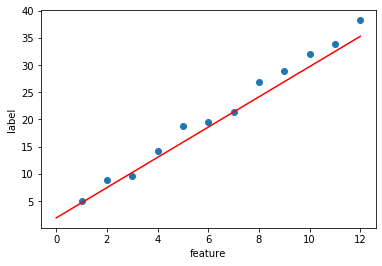

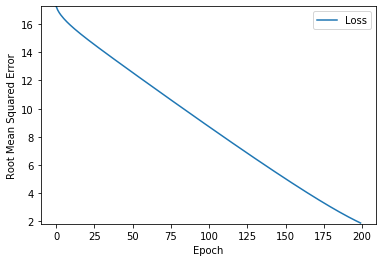

In [12]:
learning_rate=0.01
epochs=200
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
v

Epoch 1/250
12/12 [==============================] - 0s 8ms/sample - loss: 1211.0212 - root_mean_squared_error: 34.7997
Epoch 2/250
12/12 [==============================] - 0s 166us/sample - loss: 1192.9313 - root_mean_squared_error: 34.5388
Epoch 3/250
12/12 [==============================] - 0s 166us/sample - loss: 1179.9393 - root_mean_squared_error: 34.3502
Epoch 4/250
12/12 [==============================] - 0s 250us/sample - loss: 1169.1389 - root_mean_squared_error: 34.1927
Epoch 5/250
12/12 [==============================] - 0s 166us/sample - loss: 1159.6084 - root_mean_squared_error: 34.0530
Epoch 6/250
12/12 [==============================] - 0s 166us/sample - loss: 1150.9203 - root_mean_squared_error: 33.9252
Epoch 7/250
12/12 [==============================] - 0s 250us/sample - loss: 1142.8370 - root_mean_squared_error: 33.8059
Epoch 8/250
12/12 [==============================] - 0s 166us/sample - loss: 1135.2107 - root_mean_squared_error: 33.6929
Epoch 9/250
12/12 [=======

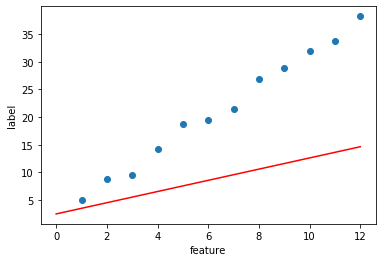

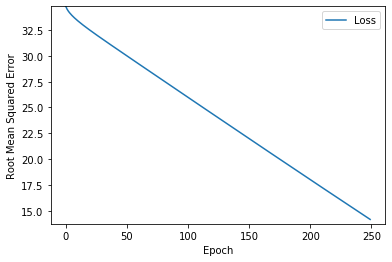

In [13]:
learning_rate=0.01
epochs=250
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
v

Epoch 1/200
12/12 [==============================] - 0s 9ms/sample - loss: 206.3256 - root_mean_squared_error: 14.3640
Epoch 2/200
12/12 [==============================] - 0s 166us/sample - loss: 198.9099 - root_mean_squared_error: 14.1035
Epoch 3/200
12/12 [==============================] - 0s 166us/sample - loss: 193.6614 - root_mean_squared_error: 13.9162
Epoch 4/200
12/12 [==============================] - 0s 332us/sample - loss: 189.3440 - root_mean_squared_error: 13.7602
Epoch 5/200
12/12 [==============================] - 0s 249us/sample - loss: 185.5676 - root_mean_squared_error: 13.6223
Epoch 6/200
12/12 [==============================] - 0s 249us/sample - loss: 182.1520 - root_mean_squared_error: 13.4964
Epoch 7/200
12/12 [==============================] - 0s 166us/sample - loss: 178.9967 - root_mean_squared_error: 13.3790
Epoch 8/200
12/12 [==============================] - 0s 166us/sample - loss: 176.0397 - root_mean_squared_error: 13.2680
Epoch 9/200
12/12 [===============

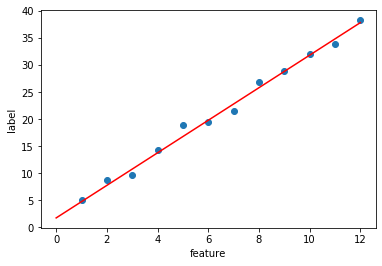

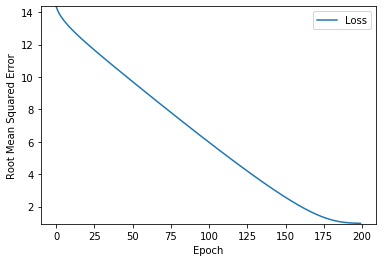

In [14]:
learning_rate=0.01
epochs=200
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/250
12/12 [==============================] - 0s 7ms/sample - loss: 179.1519 - root_mean_squared_error: 13.3848
Epoch 2/250
12/12 [==============================] - 0s 166us/sample - loss: 172.2493 - root_mean_squared_error: 13.1244
Epoch 3/250
12/12 [==============================] - 0s 250us/sample - loss: 167.3729 - root_mean_squared_error: 12.9373
Epoch 4/250
12/12 [==============================] - 0s 166us/sample - loss: 163.3670 - root_mean_squared_error: 12.7815
Epoch 5/250
12/12 [==============================] - 0s 416us/sample - loss: 159.8671 - root_mean_squared_error: 12.6439
Epoch 6/250
12/12 [==============================] - 0s 1ms/sample - loss: 156.7046 - root_mean_squared_error: 12.5182
Epoch 7/250
12/12 [==============================] - 0s 83us/sample - loss: 153.7860 - root_mean_squared_error: 12.4010
Epoch 8/250
12/12 [==============================] - 0s 251us/sample - loss: 151.0532 - root_mean_squared_error: 12.2904
Epoch 9/250
12/12 [==================

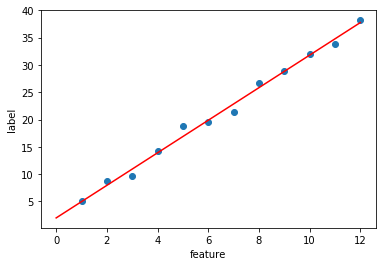

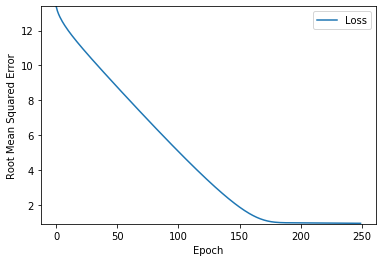

In [15]:
learning_rate=0.01
epochs=250
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/500
12/12 [==============================] - 0s 9ms/sample - loss: 242.5983 - root_mean_squared_error: 15.5756
Epoch 2/500
12/12 [==============================] - 0s 166us/sample - loss: 234.5483 - root_mean_squared_error: 15.3150
Epoch 3/500
12/12 [==============================] - 0s 166us/sample - loss: 228.8396 - root_mean_squared_error: 15.1274
Epoch 4/500
12/12 [==============================] - 0s 250us/sample - loss: 224.1370 - root_mean_squared_error: 14.9712
Epoch 5/500
12/12 [==============================] - 0s 166us/sample - loss: 220.0188 - root_mean_squared_error: 14.8330
Epoch 6/500
12/12 [==============================] - 0s 166us/sample - loss: 216.2900 - root_mean_squared_error: 14.7068
Epoch 7/500
12/12 [==============================] - 0s 249us/sample - loss: 212.8422 - root_mean_squared_error: 14.5891
Epoch 8/500
12/12 [==============================] - 0s 332us/sample - loss: 209.6079 - root_mean_squared_error: 14.4778
Epoch 9/500
12/12 [===============

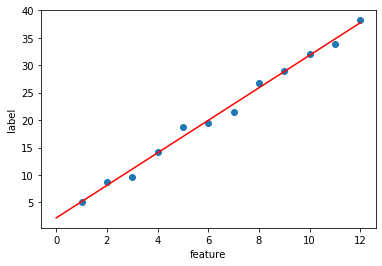

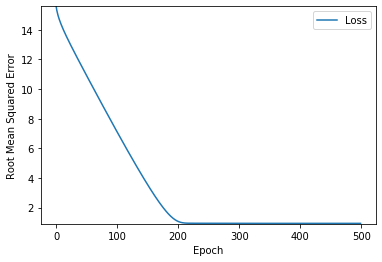

In [16]:
learning_rate=0.01
epochs=500
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/500
12/12 [==============================] - 0s 8ms/sample - loss: 1145.3909 - root_mean_squared_error: 33.8436
Epoch 2/500
12/12 [==============================] - 0s 249us/sample - loss: 6641217.5000 - root_mean_squared_error: 2577.0559
Epoch 3/500
12/12 [==============================] - 0s 166us/sample - loss: 1131.7518 - root_mean_squared_error: 33.6415
Epoch 4/500
12/12 [==============================] - 0s 166us/sample - loss: 6.8253 - root_mean_squared_error: 2.6125
Epoch 5/500
12/12 [==============================] - 0s 251us/sample - loss: 1.6768 - root_mean_squared_error: 1.2949
Epoch 6/500
12/12 [==============================] - 0s 166us/sample - loss: 1.5539 - root_mean_squared_error: 1.2466
Epoch 7/500
12/12 [==============================] - 0s 166us/sample - loss: 1.5077 - root_mean_squared_error: 1.2279
Epoch 8/500
12/12 [==============================] - 0s 166us/sample - loss: 1.4647 - root_mean_squared_error: 1.2102
Epoch 9/500
12/12 [======================

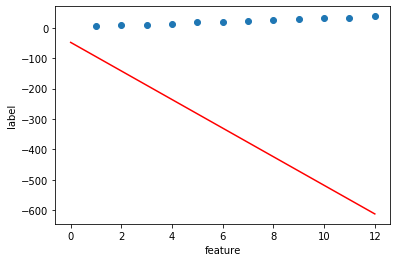

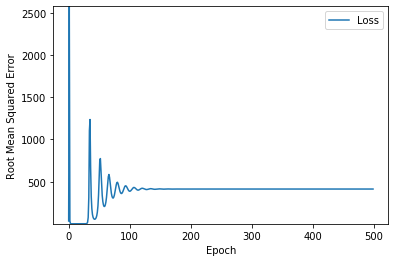

In [17]:
learning_rate=100
epochs=500
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/30
12/12 [==============================] - 0s 10ms/sample - loss: 393.0721 - root_mean_squared_error: 19.8260
Epoch 2/30
12/12 [==============================] - 0s 249us/sample - loss: 6713648.0000 - root_mean_squared_error: 2591.0708
Epoch 3/30
12/12 [==============================] - 0s 166us/sample - loss: 390.3617 - root_mean_squared_error: 19.7576
Epoch 4/30
12/12 [==============================] - 0s 333us/sample - loss: 2.3864 - root_mean_squared_error: 1.5448
Epoch 5/30
12/12 [==============================] - 0s 249us/sample - loss: 0.9059 - root_mean_squared_error: 0.9518
Epoch 6/30
12/12 [==============================] - 0s 166us/sample - loss: 0.8846 - root_mean_squared_error: 0.9405
Epoch 7/30
12/12 [==============================] - 0s 249us/sample - loss: 0.8834 - root_mean_squared_error: 0.9399
Epoch 8/30
12/12 [==============================] - 0s 166us/sample - loss: 0.8828 - root_mean_squared_error: 0.9396
Epoch 9/30
12/12 [==============================] 

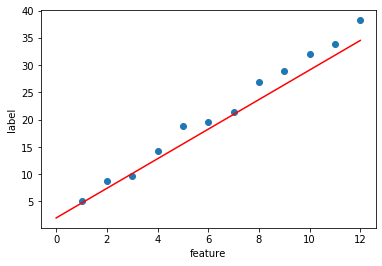

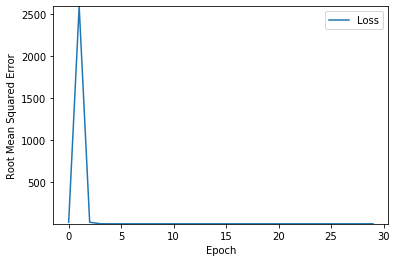

In [18]:
learning_rate=100
epochs=30
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/4
12/12 [==============================] - 0s 10ms/sample - loss: 544.6080 - root_mean_squared_error: 23.3368
Epoch 2/4
12/12 [==============================] - 0s 166us/sample - loss: 6695458.0000 - root_mean_squared_error: 2587.5583
Epoch 3/4
12/12 [==============================] - 0s 166us/sample - loss: 540.1736 - root_mean_squared_error: 23.2416
Epoch 4/4
12/12 [==============================] - 0s 416us/sample - loss: 3.1360 - root_mean_squared_error: 1.7709


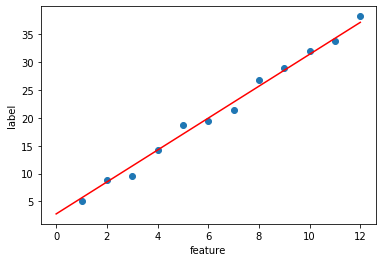

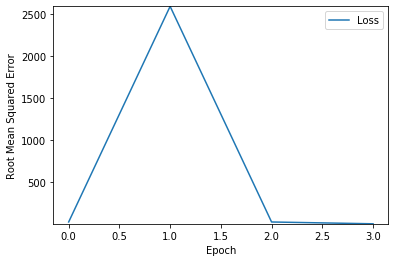

In [19]:
learning_rate=100
epochs=4
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/5
12/12 [==============================] - 0s 10ms/sample - loss: 172.9838 - root_mean_squared_error: 13.1523
Epoch 2/5
12/12 [==============================] - 0s 168us/sample - loss: 6748350.0000 - root_mean_squared_error: 2597.7585
Epoch 3/5
12/12 [==============================] - 0s 249us/sample - loss: 172.1981 - root_mean_squared_error: 13.1224
Epoch 4/5
12/12 [==============================] - 0s 332us/sample - loss: 1.5521 - root_mean_squared_error: 1.2458
Epoch 5/5
12/12 [==============================] - 0s 167us/sample - loss: 0.9521 - root_mean_squared_error: 0.9758


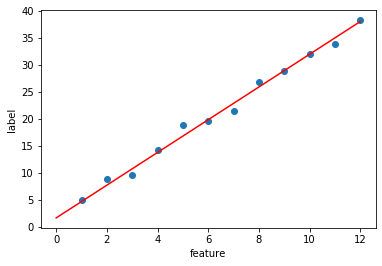

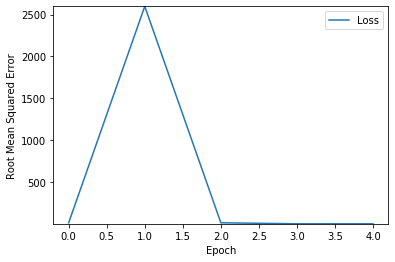

In [20]:
learning_rate=100
epochs=5
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/4
12/12 [==============================] - 0s 8ms/sample - loss: 405.7279 - root_mean_squared_error: 20.1427
Epoch 2/4
12/12 [==============================] - 0s 166us/sample - loss: 395.2897 - root_mean_squared_error: 19.8819
Epoch 3/4
12/12 [==============================] - 0s 165us/sample - loss: 387.8485 - root_mean_squared_error: 19.6939
Epoch 4/4
12/12 [==============================] - 0s 166us/sample - loss: 381.6956 - root_mean_squared_error: 19.5370


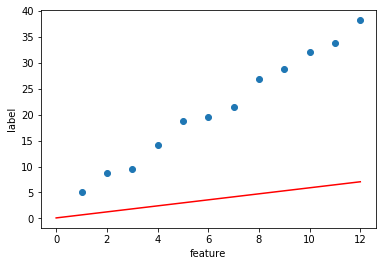

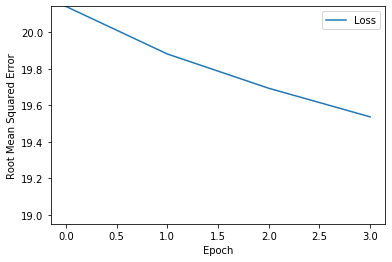

In [9]:
learning_rate=100
epochs=5
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/70
12/12 [==============================] - 0s 10ms/sample - loss: 402.1442 - root_mean_squared_error: 20.0535
Epoch 2/70
12/12 [==============================] - 0s 83us/sample - loss: 269.0666 - root_mean_squared_error: 16.4032
Epoch 3/70
12/12 [==============================] - 0s 166us/sample - loss: 196.6090 - root_mean_squared_error: 14.0217
Epoch 4/70
12/12 [==============================] - 0s 166us/sample - loss: 148.2110 - root_mean_squared_error: 12.1742
Epoch 5/70
12/12 [==============================] - 0s 83us/sample - loss: 113.2624 - root_mean_squared_error: 10.6425
Epoch 6/70
12/12 [==============================] - 0s 166us/sample - loss: 87.0273 - root_mean_squared_error: 9.3288
Epoch 7/70
12/12 [==============================] - 0s 249us/sample - loss: 66.9162 - root_mean_squared_error: 8.1802
Epoch 8/70
12/12 [==============================] - 0s 250us/sample - loss: 51.3291 - root_mean_squared_error: 7.1644
Epoch 9/70
12/12 [==============================]

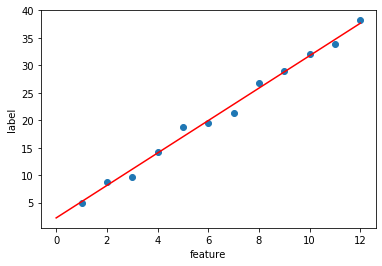

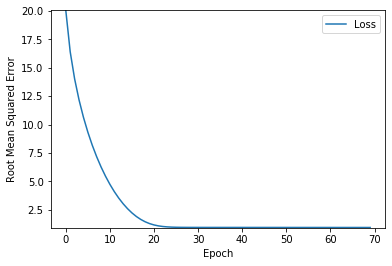

In [21]:
learning_rate=0.14
epochs=70
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/5
12/12 [==============================] - 0s 12ms/sample - loss: 394.5426 - root_mean_squared_error: 19.8631
Epoch 2/5
12/12 [==============================] - 0s 582us/sample - loss: 40.1735 - root_mean_squared_error: 6.3383
Epoch 3/5
12/12 [==============================] - 0s 415us/sample - loss: 4.8094 - root_mean_squared_error: 2.1930
Epoch 4/5
12/12 [==============================] - 0s 748us/sample - loss: 1.4500 - root_mean_squared_error: 1.2042
Epoch 5/5
12/12 [==============================] - 0s 665us/sample - loss: 0.9998 - root_mean_squared_error: 0.9999


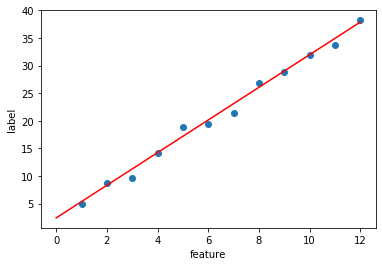

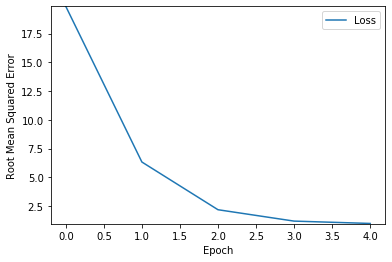

In [22]:
learning_rate=1
epochs=5
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/20
12/12 [==============================] - 0s 10ms/sample - loss: 705.8898 - root_mean_squared_error: 26.5686
Epoch 2/20
12/12 [==============================] - 0s 166us/sample - loss: 1.3043 - root_mean_squared_error: 1.1420
Epoch 3/20
12/12 [==============================] - 0s 166us/sample - loss: 1.0993 - root_mean_squared_error: 1.0485
Epoch 4/20
12/12 [==============================] - 0s 166us/sample - loss: 1.0863 - root_mean_squared_error: 1.0423
Epoch 5/20
12/12 [==============================] - 0s 166us/sample - loss: 1.0737 - root_mean_squared_error: 1.0362
Epoch 6/20
12/12 [==============================] - 0s 166us/sample - loss: 1.0612 - root_mean_squared_error: 1.0301
Epoch 7/20
12/12 [==============================] - 0s 166us/sample - loss: 1.0488 - root_mean_squared_error: 1.0241
Epoch 8/20
12/12 [==============================] - 0s 83us/sample - loss: 1.0367 - root_mean_squared_error: 1.0182
Epoch 9/20
12/12 [==============================] - 0s 166us/sa

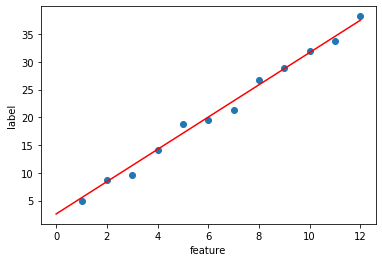

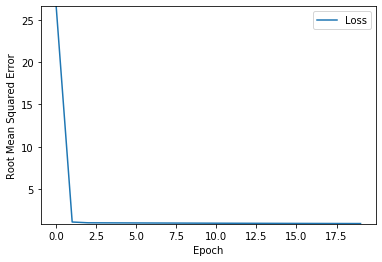

In [23]:
learning_rate=1
epochs=20
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/100
12/12 [==============================] - 0s 11ms/sample - loss: 138.1126 - root_mean_squared_error: 11.7521
Epoch 2/100
12/12 [==============================] - 0s 166us/sample - loss: 109.2451 - root_mean_squared_error: 10.4520
Epoch 3/100
12/12 [==============================] - 0s 166us/sample - loss: 91.4730 - root_mean_squared_error: 9.5642
Epoch 4/100
12/12 [==============================] - 0s 249us/sample - loss: 78.3274 - root_mean_squared_error: 8.8503
Epoch 5/100
12/12 [==============================] - 0s 333us/sample - loss: 67.8604 - root_mean_squared_error: 8.2377
Epoch 6/100
12/12 [==============================] - 0s 166us/sample - loss: 59.1902 - root_mean_squared_error: 7.6935
Epoch 7/100
12/12 [==============================] - 0s 333us/sample - loss: 51.8325 - root_mean_squared_error: 7.1995
Epoch 8/100
12/12 [==============================] - 0s 249us/sample - loss: 45.4887 - root_mean_squared_error: 6.7445
Epoch 9/100
12/12 [==========================

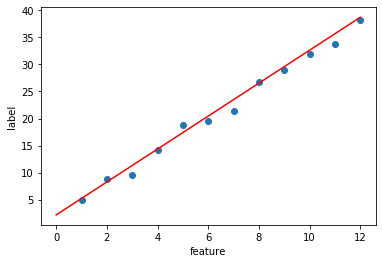

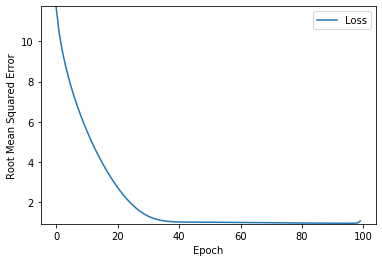

In [24]:
learning_rate=0.05
epochs=100
my_batch_size=1

my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/100
12/12 [==============================] - 1s 43ms/sample - loss: 127.7593 - root_mean_squared_error: 11.3031
Epoch 2/100
12/12 [==============================] - 0s 333us/sample - loss: 100.0709 - root_mean_squared_error: 10.0035
Epoch 3/100
12/12 [==============================] - 0s 997us/sample - loss: 83.1484 - root_mean_squared_error: 9.1186
Epoch 4/100
12/12 [==============================] - 0s 332us/sample - loss: 70.7039 - root_mean_squared_error: 8.4086
Epoch 5/100
12/12 [==============================] - 0s 416us/sample - loss: 60.8486 - root_mean_squared_error: 7.8006
Epoch 6/100
12/12 [==============================] - 0s 249us/sample - loss: 52.7280 - root_mean_squared_error: 7.2614
Epoch 7/100
12/12 [==============================] - 0s 248us/sample - loss: 45.8732 - root_mean_squared_error: 6.7730
Epoch 8/100
12/12 [==============================] - 0s 166us/sample - loss: 39.9948 - root_mean_squared_error: 6.3241
Epoch 9/100
12/12 [==========================

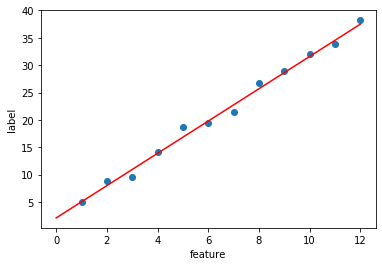

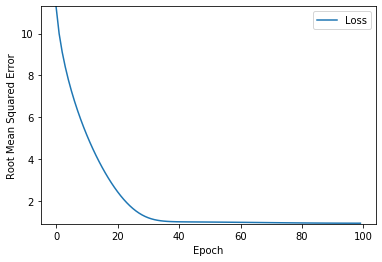

In [31]:
learning_rate=0.05
epochs=100
my_batch_size=1

my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/500
12/12 [==============================] - 0s 12ms/sample - loss: 391.3087 - root_mean_squared_error: 19.7815
Epoch 2/500
12/12 [==============================] - 0s 163us/sample - loss: 341.4242 - root_mean_squared_error: 18.4777
Epoch 3/500
12/12 [==============================] - 0s 332us/sample - loss: 308.4624 - root_mean_squared_error: 17.5631
Epoch 4/500
12/12 [==============================] - 0s 166us/sample - loss: 282.6972 - root_mean_squared_error: 16.8136
Epoch 5/500
12/12 [==============================] - 0s 250us/sample - loss: 261.1319 - root_mean_squared_error: 16.1596
Epoch 6/500
12/12 [==============================] - 0s 166us/sample - loss: 242.3960 - root_mean_squared_error: 15.5691
Epoch 7/500
12/12 [==============================] - 0s 415us/sample - loss: 225.7333 - root_mean_squared_error: 15.0244
Epoch 8/500
12/12 [==============================] - 0s 165us/sample - loss: 210.6766 - root_mean_squared_error: 14.5147
Epoch 9/500
12/12 [==============

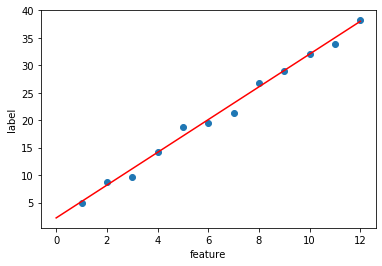

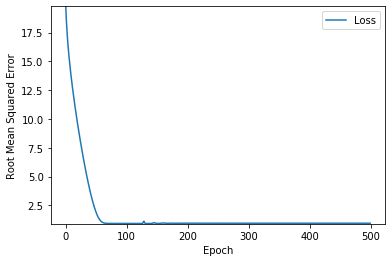

In [32]:
learning_rate=0.05
epochs=500
my_batch_size=1

my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)